# Group Project: Joint Task 1

1. Become familiar with Matlab code, generate single exponential fluorescence decays for 20-minute
acquisition times with lifetimes from 200 picoseconds (0.2 ns) to 2 ns in steps of 200ps, analyse using
nonlinear least square fiƫng in Origin, plot the single exponential lifetimes and their uncertainties.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.signal import convolve
from scipy import stats
from sympy import symbols, solve

rng = np.random.default_rng()

In [2]:
def mono_exp_sim_IRF(tau, run_time, irfwidth):
   '''Generate mono-exponetial decay curves for an array of lifetimes (n_tau)
      Photon count rate is 2500 per s
      Input:  tau (1d array of lifetimes, size = n_tau)
              run_time (in s)
              irfwidth  (sigma of Gaussian IRF)

      output: time-domain decay data (381 x n_tau) matrix (381 bins, 20ns window)'''
   #IRF properties
   t0 = 10/19 # ns, offset
   bg = 10 #counts per s
   n_bins = 380 #no. of bins
   n_photon = run_time*(2500-bg) #no. of photon collected
   n_arr = np.ones(n_photon) #array for meshgrid
   N_arr, Tau = np.meshgrid(n_arr,tau)
   t_tot = rng.normal(t0,irfwidth,size = np.shape(Tau)) + rng.exponential(Tau)
   output = np.zeros((len(tau),n_bins)) #store output data
   for i in range(len(tau)):
       output[i],bins = np.histogram(t_tot[i], bins=380,range = (0,20))
       output[i] += np.full(n_bins, int(bg*run_time/n_bins)) #add background
   return output,bins[:-1]

Text(0, 0.5, 'Photon Counts')

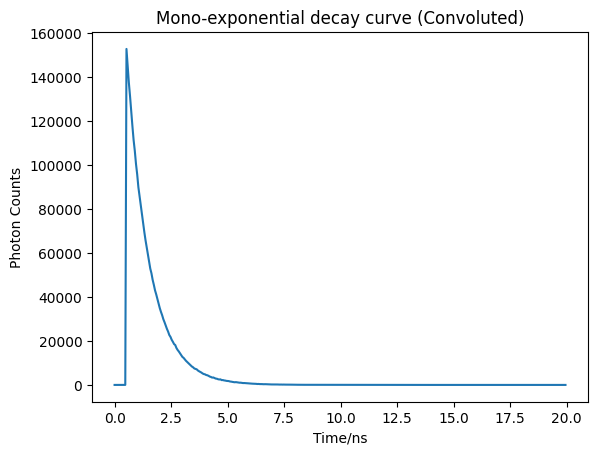

In [3]:
run_time = 20*60 #s
t0 = 10/19 #offset, ns
irfwidth = 1e-5 #IRF Gaussian sigma, ns
tau = [1,3,9] #lifetime array, ns
mono_exp,bins = mono_exp_sim_IRF(tau,run_time , irfwidth)
I = mono_exp[0]
plt.figure()
plt.title('Mono-exponential decay curve (Convoluted)')
plt.plot(bins,I)
plt.xlabel('Time/ns')
plt.ylabel('Photon Counts')

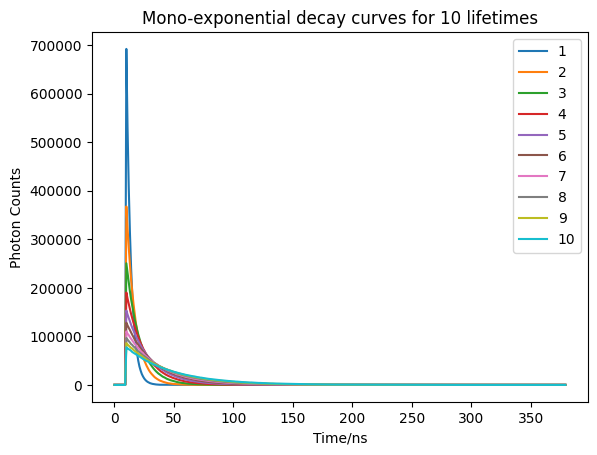

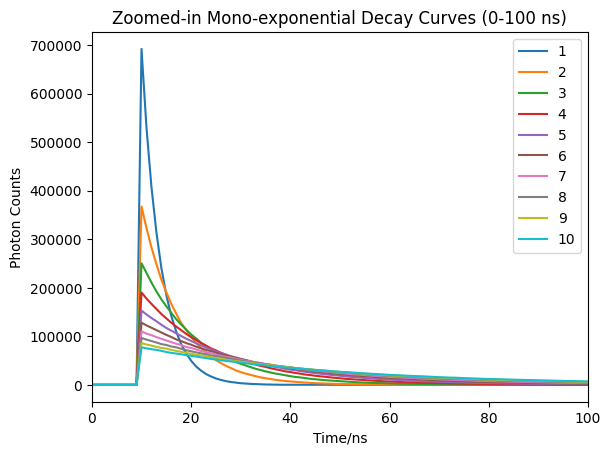

In [6]:
tau_arr = np.linspace(0.2,2,10) #array of lifetimes specified in task 1, ns
output, bins = mono_exp_sim_IRF(tau_arr,run_time, irfwidth)
for i in range(10):
  plt.plot(output[i],label = i+1)
  plt.xlabel('Time/ns')
  plt.ylabel('Photon Counts')
  plt.title('Mono-exponential decay curves for 10 lifetimes')
  plt.legend()

plt.figure()
for i in range(10):
  plt.plot(output[i],label = i+1)
  plt.xlabel('Time/ns')
  plt.ylabel('Photon Counts')
  plt.title('Zoomed-in Mono-exponential Decay Curves (0-100 ns)')
  plt.xlim([0,100])
  plt.legend()

Parameter uncertainties:
Fit 1:
Amplitude: 8.7639e+06 ± 6.5165e+05
Lifetime: 0.2028 ns ± 0.0021 ns

Fit 2:
Amplitude: 1.3741e+06 ± 8.3176e+03
Lifetime: 0.4004 ns ± 0.0006 ns

Fit 3:
Amplitude: 5.9572e+05 ± 1.8209e+03
Lifetime: 0.6029 ns ± 0.0007 ns

Fit 4:
Amplitude: 3.6659e+05 ± 8.0414e+02
Lifetime: 0.8010 ns ± 0.0008 ns

Fit 5:
Amplitude: 2.5816e+05 ± 4.5315e+02
Lifetime: 1.0032 ns ± 0.0009 ns

Fit 6:
Amplitude: 1.9767e+05 ± 3.0692e+02
Lifetime: 1.2046 ns ± 0.0011 ns

Fit 7:
Amplitude: 1.5991e+05 ± 1.6976e+02
Lifetime: 1.4043 ns ± 0.0010 ns

Fit 8:
Amplitude: 1.3436e+05 ± 1.2705e+02
Lifetime: 1.6025 ns ± 0.0011 ns

Fit 9:
Amplitude: 1.1519e+05 ± 1.1594e+02
Lifetime: 1.8041 ns ± 0.0014 ns

Fit 10:
Amplitude: 1.0063e+05 ± 8.2977e+01
Lifetime: 2.0063 ns ± 0.0013 ns



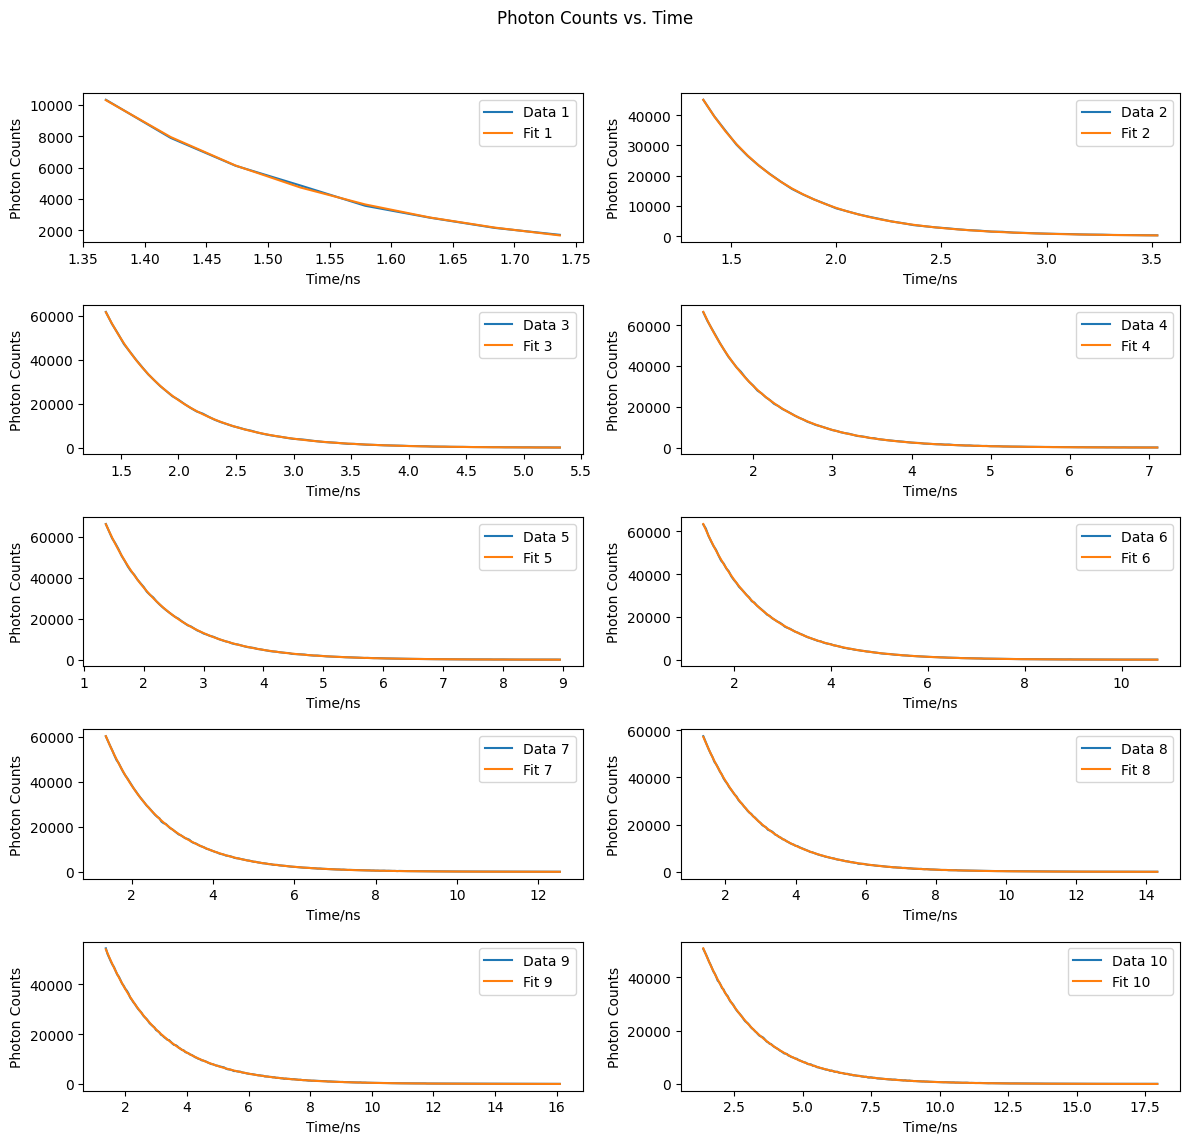

In [9]:
from scipy.optimize import curve_fit
p_list = []
cov_list = []
p0_arr = [[1e6,1],[1e6,1],[1e6,1],[1e6,1],[1e6,1],[1e6,1],[1e6,1],[1e6,1],[4e5,1.8],[4e5,2]]
def exp1(t,f,tau):
    '''t - time in ns
    f - ampitude
     tau - lifetime'''
    return f*np.exp(-t/tau)

fig, axs = plt.subplots(5, 2, figsize=(12, 12))
fig.suptitle('Photon Counts vs. Time')

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i in range(10):
  end = int(tau_arr[i]*9*19)
  t = bins[26:end]
  ydata = output[i,26:end]

  p, cov = curve_fit(exp1,t, ydata, p0 = p0_arr[i])
  p_list.append(p)
  cov_list.append(cov)


  axs[i].plot(t, ydata, label=f'Data {i+1}')
  axs[i].plot(t, exp1(t, *p), label=f'Fit {i+1}')
  axs[i].set_xlabel('Time/ns')
  axs[i].set_ylabel('Photon Counts')
  axs[i].legend()

# Print uncertainties for each fit
print("Parameter uncertainties:")
for i in range(10):
    print(f"Fit {i+1}:")
    amplitude, lifetime = p_list[i]
    amplitude_uncertainty, lifetime_uncertainty = np.sqrt(np.diag(cov_list[i]))

    print(f"Amplitude: {amplitude:.4e} ± {amplitude_uncertainty:.4e}")
    print(f"Lifetime: {lifetime:.4f} ns ± {lifetime_uncertainty:.4f} ns")
    print()

# Show plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()